In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

comment_file_path = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        print(full_filename)
        if 'jd_comment' in full_filename:
            comment_file_path = full_filename

df = pd.read_excel(comment_file_path)
cols = df.columns
df_data = df[[cols[5],cols[4]]]
data = [i for i in df_data.values if i[0] != '此用户未填写评价内容']
print(len(data))
data[:5]

/kaggle/input/jd_comment_with_label/jd_comment_data.xlsx
44422


[array(['一般般，一分钱一分货吧', 1], dtype=object),
 array(['商品质量很好，很满意，配送速度快啊，而且配送员态度也非常好。', 4], dtype=object),
 array(['。。。', 5], dtype=object),
 array(['刘慧敏提莫摸摸摸休息泽TCL退咯的一组婆婆破鼓规土局', 5], dtype=object),
 array(['还好还好还好还好红红火火好很好好', 5], dtype=object)]

In [2]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer,pipeline

MODEL_NAME = 'uer/roberta-base-finetuned-dianping-chinese'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

text_classification = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
print(text_classification("北京上个月召开了两会"))

classifier = pipeline('text-classification', model=MODEL_NAME)
print(classifier(['方便快', '就是贵了点']))


2025-05-22 05:41:57.428632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747892517.616306      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747892517.669900      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/409M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'positive (stars 4 and 5)', 'score': 0.8742132186889648}]


Device set to use cuda:0


[{'label': 'positive (stars 4 and 5)', 'score': 0.6400418281555176}, {'label': 'negative (stars 1, 2 and 3)', 'score': 0.5725958347320557}]


In [3]:
from transformers import AutoModel,AutoModelForMaskedLM,AutoTokenizer,AutoModelForSequenceClassification
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

MODEL_NAME = 'google-bert/bert-base-chinese'

def create_model():
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
    # model = AutoModelForMaskedLM.from_pretrained(MODEL_NAME)
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=5)
    classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
    return tokenizer, model, classifier
    
tokenizer, model, classifier = create_model()
# print(model.config)
token_inds = tokenizer('本篇论文介绍了一种名为Qwen2.5-Omni的端到端多模态模型，该模型可以感知包括文本、图像、音频和视频在内的多种模态，并在流式处理中同时生成文本和自然语音响应。为了实现多模态信息输入的流式传输，音频和视觉编码器采用了块状处理方法。这种分工策略增强了不同模态之间的融合，通过共享注意力机制将感知责任分配给多模态编码器，将扩展序列建模任务委托给大型语言模型。此外，论文还提出了一个名为Thinker-Talker架构的框架，用于并发地生成文本和语音，避免两种模态之间的干扰。该模型的性能在多个基准测试中表现出色，特别是在多模态任务上取得了最先进的结果。',return_tensors='pt')
token_inds = token_inds.to(device)
for i in zip(token_inds):
    print(i[0], token_inds.get(i[0]).shape)
print(tokenizer.decode(token_inds.input_ids.squeeze(0)))
out = model(**token_inds)
for i in zip(out):
    print(i, out[i[0]])

# classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

print(classifier(['好吃','难吃']))

cuda


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


input_ids torch.Size([1, 260])
token_type_ids torch.Size([1, 260])
attention_mask torch.Size([1, 260])
[CLS] 本 篇 论 文 介 绍 了 一 种 名 为 [UNK]. 5 - [UNK] 的 端 到 端 多 模 态 模 型 ， 该 模 型 可 以 感 知 包 括 文 本 、 图 像 、 音 频 和 视 频 在 内 的 多 种 模 态 ， 并 在 流 式 处 理 中 同 时 生 成 文 本 和 自 然 语 音 响 应 。 为 了 实 现 多 模 态 信 息 输 入 的 流 式 传 输 ， 音 频 和 视 觉 编 码 器 采 用 了 块 状 处 理 方 法 。 这 种 分 工 策 略 增 强 了 不 同 模 态 之 间 的 融 合 ， 通 过 共 享 注 意 力 机 制 将 感 知 责 任 分 配 给 多 模 态 编 码 器 ， 将 扩 展 序 列 建 模 任 务 委 托 给 大 型 语 言 模 型 。 此 外 ， 论 文 还 提 出 了 一 个 名 为 [UNK] - [UNK] 架 构 的 框 架 ， 用 于 并 发 地 生 成 文 本 和 语 音 ， 避 免 两 种 模 态 之 间 的 干 扰 。 该 模 型 的 性 能 在 多 个 基 准 测 试 中 表 现 出 色 ， 特 别 是 在 多 模 态 任 务 上 取 得 了 最 先 进 的 结 果 。 [SEP]
('logits',) tensor([[-0.8524, -0.0874,  0.4710, -0.2758,  0.5285]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
[{'label': 'LABEL_2', 'score': 0.33244046568870544}, {'label': 'LABEL_2', 'score': 0.32857730984687805}]


In [4]:
from torch.utils.data import DataLoader

def create_dl(tokenizer, data_len=-1):
    def collate_fn(batch_data):
        comments = []
        labels = []
        for comment,score in batch_data:
            comments.append(comment)
            labels.append(int(score)-1)
        comments_pt = tokenizer(comments, return_tensors='pt',padding=True,truncation=True,max_length=256).to(device)
        labels_pt = torch.tensor(labels,device=device)
        return comments_pt,labels_pt
    
    return DataLoader(data[:data_len] if data_len > 0 else data, batch_size=10,shuffle=True,collate_fn = collate_fn)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


0m 1s (- 0m 30s) (5 5%) 1.1188
0m 2s (- 0m 26s) (10 10%) 0.6639
0m 4s (- 0m 23s) (15 15%) 0.4346
0m 5s (- 0m 22s) (20 20%) 0.2850
0m 6s (- 0m 20s) (25 25%) 0.1923
0m 8s (- 0m 19s) (30 30%) 0.1319
0m 9s (- 0m 17s) (35 35%) 0.0934
0m 10s (- 0m 16s) (40 40%) 0.0678
0m 12s (- 0m 14s) (45 45%) 0.0505
0m 13s (- 0m 13s) (50 50%) 0.0386
0m 14s (- 0m 12s) (55 55%) 0.0311
0m 16s (- 0m 10s) (60 60%) 0.0259
0m 17s (- 0m 9s) (65 65%) 0.0223
0m 18s (- 0m 8s) (70 70%) 0.0195
0m 20s (- 0m 6s) (75 75%) 0.0174
0m 21s (- 0m 5s) (80 80%) 0.0157
0m 22s (- 0m 4s) (85 85%) 0.0142
0m 24s (- 0m 2s) (90 90%) 0.0129
0m 25s (- 0m 1s) (95 95%) 0.0115
0m 26s (- 0m 0s) (100 100%) 0.0103


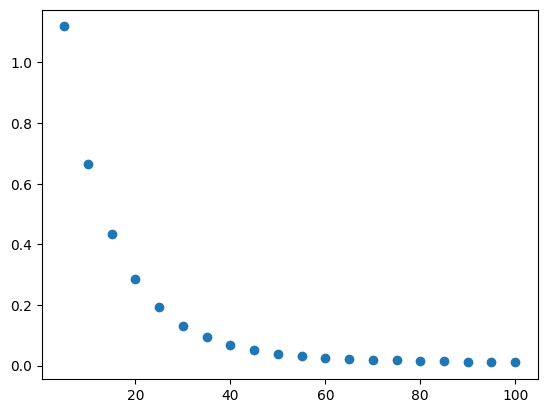

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


0m 1s (- 0m 25s) (5 5%) 1.5732
0m 2s (- 0m 23s) (10 10%) 0.9760
0m 3s (- 0m 22s) (15 15%) 0.5636
0m 5s (- 0m 21s) (20 20%) 0.3472
0m 6s (- 0m 19s) (25 25%) 0.2259
0m 7s (- 0m 18s) (30 30%) 0.1617
0m 9s (- 0m 17s) (35 35%) 0.1245
0m 10s (- 0m 15s) (40 40%) 0.0999
0m 11s (- 0m 14s) (45 45%) 0.0823
0m 13s (- 0m 13s) (50 50%) 0.0677
0m 14s (- 0m 11s) (55 55%) 0.0555
0m 15s (- 0m 10s) (60 60%) 0.0467
0m 17s (- 0m 9s) (65 65%) 0.0397
0m 18s (- 0m 7s) (70 70%) 0.0341
0m 19s (- 0m 6s) (75 75%) 0.0300
0m 21s (- 0m 5s) (80 80%) 0.0266
0m 22s (- 0m 3s) (85 85%) 0.0239
0m 23s (- 0m 2s) (90 90%) 0.0216
0m 25s (- 0m 1s) (95 95%) 0.0197
0m 26s (- 0m 0s) (100 100%) 0.0180


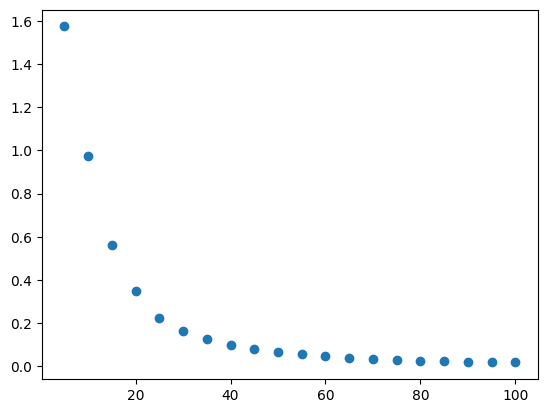

In [6]:
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import math
import random
import time

writer = SummaryWriter("logs")

def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))
    
def train_epoch(dataloader, model, optimizer, criterion):
    total_loss = 0
    for input_tensor, target_tensor in dataloader:
        optimizer.zero_grad()
        # print(input_tensor)
        out = model(**input_tensor)
        # print(out.shape, target_tensor.shape)
        loss = criterion(
            out.logits,
            target_tensor
        )
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def train(train_dataloader, model, n_epochs,ifFreeze, learning_rate=1e-5,
               print_every=5, plot_every=5):
    if ifFreeze:
        model.bert.trainable=False
    start = time.time()
    plot_epoches = []
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(1, n_epochs + 1):
        loss = train_epoch(train_dataloader, model, optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if epoch % print_every == 0:
            print_loss_avg = print_loss_total / print_every
            print_loss_total = 0
            print('%s (%d %d%%) %.4f' % (timeSince(start, epoch / n_epochs),
                                        epoch, epoch / n_epochs * 100, print_loss_avg))

        if epoch % plot_every == 0:
            plot_loss_avg = plot_loss_total / plot_every
            plot_losses.append(plot_loss_avg)
            plot_loss_total = 0
            plot_epoches.append(epoch)
            writer.add_scalars('loss', {'%s'%ifFreeze: plot_loss_avg},epoch)
            
    plt.scatter(plot_epoches, plot_losses)
    plt.show()

save_path = [f'/kaggle/working/bert_text_classfication_{i}.pt' for i in range(2)]

tokenizer1, model1, classifier1 = create_model()
dl1 = create_dl(tokenizer1, 10)
train(dl1, model1, 100, False)
torch.save(model1.state_dict(), save_path[0])

tokenizer2, model2, classifier2 = create_model()
dl2 = create_dl(tokenizer2, 10)
train(dl2, model2, 100, True)
torch.save(model2.state_dict(), save_path[1])

writer.close()

In [8]:
from transformers import AutoConfig, BertModel

def evaluate(path, input):
    print(path)
    _, new_model, new_classifier = create_model()
    state = torch.load(path)
    print(new_classifier(input))
    new_model.load_state_dict(state)
    print(new_classifier(input))

test_input = ['好吃','难吃']
print(1, classifier1(test_input))
print(2, classifier2(test_input))
evaluate(save_path[0], test_input)
evaluate(save_path[1], test_input)

1 [{'label': 'LABEL_4', 'score': 0.824718713760376}, {'label': 'LABEL_4', 'score': 0.849029004573822}]
2 [{'label': 'LABEL_4', 'score': 0.48199471831321716}, {'label': 'LABEL_4', 'score': 0.5811551213264465}]
/kaggle/working/bert_text_classfication_0.pt


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


[{'label': 'LABEL_0', 'score': 0.3385803997516632}, {'label': 'LABEL_0', 'score': 0.30368363857269287}]
[{'label': 'LABEL_4', 'score': 0.824718713760376}, {'label': 'LABEL_4', 'score': 0.849029004573822}]
/kaggle/working/bert_text_classfication_1.pt


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-chinese and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


[{'label': 'LABEL_4', 'score': 0.27259427309036255}, {'label': 'LABEL_4', 'score': 0.2639414966106415}]
[{'label': 'LABEL_4', 'score': 0.48199471831321716}, {'label': 'LABEL_4', 'score': 0.5811551213264465}]
